In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns
import os

# Fetching Data

In [2]:
#merging all data set

# Path to my folder of datasets
folder_path = "/Users/deen/Desktop/crime analysis/merging"

# Get list of all CSV files
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
data=pd.DataFrame(df)

# Preview the combined dataset
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2024-09,West Midlands Police,West Midlands Police,-1.850772,52.588709,On or near Seymour Gardens,E01009417,Birmingham 001A,Anti-social behaviour,NaN,NaN
1,7a8b7c7f0b8e6f113788e25ec5edf45268fd614ae70307...,2024-09,West Midlands Police,West Midlands Police,-1.849177,52.593202,On or near Russell Bank Road,E01009417,Birmingham 001A,Vehicle crime,Unable to prosecute suspect,NaN
2,620cd472328f788c78bb36d59e58a65fe3df5631692be7...,2024-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
3,242dabdcb663b6fc50b7a7cdb5a32c12c6b409fe7d8f1e...,2024-09,West Midlands Police,West Midlands Police,-1.847123,52.593864,On or near Bramble Way,E01009417,Birmingham 001A,Violence and sexual offences,Action to be taken by another organisation,NaN
4,482aa09a8759507ae8fc3ce5e2ae954bec63e0b7695f42...,2024-09,West Midlands Police,West Midlands Police,-1.849790,52.590937,On or near Walsall Road,E01009417,Birmingham 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN


# Data Cleaning 

In [3]:
#drop Nan column
dropped_column=data.drop(columns=['Context']) 

#selecting specific column 
columns_to_use=data[['Crime ID', 'Month', 'Longitude', 'Latitude', 'Location', 'Crime type', 'LSOA name', 'Last outcome category']]

is_coventary=columns_to_use['LSOA name'].str.startswith('Coventry',na=False)
Analysis_data=columns_to_use[is_coventary]

#filter just coventry
# Town=['Coventry 024B']
# Analysis_data=columns_to_use[columns_to_use['LSOA name'].isin(Town)]

# Sorting the columns by month
Analysis_data=Analysis_data.sort_values(by='Month')

#previewing sorted data
print(Analysis_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 255919 entries, 1634108 to 676155
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               229191 non-null  object 
 1   Month                  255919 non-null  object 
 2   Longitude              255919 non-null  float64
 3   Latitude               255919 non-null  float64
 4   Location               255919 non-null  object 
 5   Crime type             255919 non-null  object 
 6   LSOA name              255919 non-null  object 
 7   Last outcome category  229191 non-null  object 
dtypes: float64(2), object(6)
memory usage: 17.6+ MB
None


In [4]:
Analysis_data.head()

,Crime ID,Month,Longitude,Latitude,Location,Crime type,LSOA name,Last outcome category
1634108,NaN,2019-01,-1.598812,52.410275,On or near Monticello Way,Anti-social behaviour,Coventry 025C,NaN
1634369,11bd2757a9910d9bcaf9b94582fbf85a401f8120fa3642...,2019-01,-1.530224,52.406885,On or near Latham Road,Public order,Coventry 030B,Unable to prosecute suspect
1634370,5f1028e547caed33cd91c1e1797624b2aa99ec99441797...,2019-01,-1.524200,52.406645,On or near Butts Road,Shoplifting,Coventry 030B,Investigation complete; no suspect identified
1634371,2ab87828ccd9b25a63132ca07a573d02cbcd08bf73156b...,2019-01,-1.524200,52.406645,On or near Butts Road,Shoplifting,Coventry 030B,Investigation complete; no suspect identified
1634372,6eaee18ac9109e45d12999ff1e0eda67d3e136731cc4e1...,2019-01,-1.528377,52.406446,On or near Shakleton Road,Vehicle crime,Coventry 030B,Investigation complete; no suspect identified


In [5]:
# Handling NaN values

print(Analysis_data.isna().sum()) #check the sum of null values

# Checking if any rows have no missing values
print("Rows with no missing values:", len(Analysis_data.dropna()))

#Removing nan values
Analysis_data=Analysis_data.dropna()
Analysis_data.info()



Crime ID                 26728
Month                        0
Longitude                    0
Latitude                     0
Location                     0
Crime type                   0
LSOA name                    0
Last outcome category    26728
dtype: int64
Rows with no missing values: 229191
<class 'pandas.core.frame.DataFrame'>
Index: 229191 entries, 1634369 to 676155
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               229191 non-null  object 
 1   Month                  229191 non-null  object 
 2   Longitude              229191 non-null  float64
 3   Latitude               229191 non-null  float64
 4   Location               229191 non-null  object 
 5   Crime type             229191 non-null  object 
 6   LSOA name              229191 non-null  object 
 7   Last outcome category  229191 non-null  object 
dtypes: float64(2), object(6)
memory usage: 15.7+ MB


# Handling Datatypes

In [6]:
Analysis_data['Month'] = pd.to_datetime(Analysis_data['Month'],format='%Y-%m')
Analysis_data.set_index('Month', inplace=True)


# Create additional time-based features
Analysis_data['Year'] = Analysis_data.index.year
Analysis_data['MonthNum'] = Analysis_data.index.month
Analysis_data['MonthName'] = Analysis_data.index.strftime('%B')
Analysis_data.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229191 entries, 2019-01-01 to 2025-05-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               229191 non-null  object 
 1   Longitude              229191 non-null  float64
 2   Latitude               229191 non-null  float64
 3   Location               229191 non-null  object 
 4   Crime type             229191 non-null  object 
 5   LSOA name              229191 non-null  object 
 6   Last outcome category  229191 non-null  object 
 7   Year                   229191 non-null  int32  
 8   MonthNum               229191 non-null  int32  
 9   MonthName              229191 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 17.5+ MB


In [7]:
Analysis_data

,Crime ID,Longitude,Latitude,Location,Crime type,LSOA name,Last outcome category,Year,MonthNum,MonthName
Month,,,,,,,,,,
2019-01-01,11bd2757a9910d9bcaf9b94582fbf85a401f8120fa3642...,-1.530224,52.406885,On or near Latham Road,Public order,Coventry 030B,Unable to prosecute suspect,2019,1,January
2019-01-01,5f1028e547caed33cd91c1e1797624b2aa99ec99441797...,-1.524200,52.406645,On or near Butts Road,Shoplifting,Coventry 030B,Investigation complete; no suspect identified,2019,1,January
2019-01-01,2ab87828ccd9b25a63132ca07a573d02cbcd08bf73156b...,-1.524200,52.406645,On or near Butts Road,Shoplifting,Coventry 030B,Investigation complete; no suspect identified,2019,1,January
2019-01-01,6eaee18ac9109e45d12999ff1e0eda67d3e136731cc4e1...,-1.528377,52.406446,On or near Shakleton Road,Vehicle crime,Coventry 030B,Investigation complete; no suspect identified,2019,1,January
2019-01-01,a954c3e1cb69504ca66fa8d1f00c5525e2fc6605db6c4d...,-1.525998,52.406221,On or near Sports/Recreation Area,Violence and sexual offences,Coventry 030B,Unable to prosecute suspect,2019,1,January
...,...,...,...,...,...,...,...,...,...,...
2025-05-01,c7f1c6cd62d03fa1900fa551290590da2fb1990bb0e819...,-1.519895,52.403697,On or near Regent Street,Violence and sexual offences,Coventry 031B,Under investigation,2025,5,May
2025-05-01,4d0c061a7a623346423e95a9b2d2b11aa26fa2c44e529f...,-1.521247,52.405123,On or near Parking Area,Violence and sexual offences,Coventry 031B,Under investigation,2025,5,May
2025-05-01,90a8b96b526ec3441c516a5e37d978c67d299b312015a9...,-1.515848,52.402809,On or near Parking Area,Violence and sexual offences,Coventry 031B,Unable to prosecute suspect,2025,5,May


In [8]:
#handling datatypes 
# Analysis_data['Month'] = pd.to_datetime(Analysis_data['Month'],format='%Y-%m').dt.to_period('M') #changing month to date format
# print(Analysis_data.info())

# #numerical statistcs
# Analysis_data.describe()

In [9]:
Analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229191 entries, 2019-01-01 to 2025-05-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               229191 non-null  object 
 1   Longitude              229191 non-null  float64
 2   Latitude               229191 non-null  float64
 3   Location               229191 non-null  object 
 4   Crime type             229191 non-null  object 
 5   LSOA name              229191 non-null  object 
 6   Last outcome category  229191 non-null  object 
 7   Year                   229191 non-null  int32  
 8   MonthNum               229191 non-null  int32  
 9   MonthName              229191 non-null  object 
dtypes: float64(2), int32(2), object(6)
memory usage: 17.5+ MB


# Descriptive Analysis 

In [10]:
#crime counts
crime_count=Analysis_data['Crime type'].value_counts()
print(f'The crime counts are:\n {crime_count} \n')
print (f' The average crime count is: \n {crime_count.mean()}')

The crime counts are:
 Crime type
Violence and sexual offences    96601
Vehicle crime                   26081
Criminal damage and arson       19947
Public order                    16963
Other theft                     16540
Burglary                        14218
Shoplifting                     14205
Drugs                            5943
Robbery                          5167
Other crime                      4359
Possession of weapons            3630
Bicycle theft                    3143
Theft from the person            2394
Name: count, dtype: int64 

 The average crime count is: 
 17630.076923076922


In [11]:
# # Extract year and month
# Analysis_data['Year'] = Analysis_data['Month'].dt.year
# Analysis_data['Month_Name'] = Analysis_data['Month'].dt.to_timestamp().dt.month_name()

# # Crimes per month (averaged across years)
# monthly_counts = Analysis_data.groupby(['MonthNum', 'MonthName']).size().reset_index(name='CrimeCount')
# monthly_counts=monthly_counts.sort_values('MonthNum')

# Crimes per year
yearly_counts = Analysis_data.groupby('Year').size()
print("\n Total Crimes per Year:\n", yearly_counts)

#Crimes per month 
monthly_counts = Analysis_data[['MonthNum','MonthName']].value_counts().sort_index()
monthly_counts = monthly_counts.rename('Crime_Count').reset_index().set_index('MonthNum')


print("\n Total Crimes per Month:\n",monthly_counts)


 Total Crimes per Year:
 Year
2019    28389
2020    29442
2021    38618
2022    42036
2023    40348
2024    36827
2025    13531
dtype: int64

 Total Crimes per Month:
           MonthName  Crime_Count
MonthNum                        
1           January        19854
2          February        19361
3             March        21275
4             April        20109
5               May        21132
6              June        17980
7              July        18840
8            August        18133
9         September        17886
10          October        18649
11         November        18604
12         December        17368


In [12]:
monthly_crime=Analysis_data.groupby(['Year','MonthNum','MonthName']).size().reset_index(name='CrimeCount')
monthly_crime.sort_values('MonthNum')

print("\nCrimes per Month for each year:\n",monthly_crime[['Year','MonthName', 'CrimeCount']])



Crimes per Month for each year:
     Year MonthName  CrimeCount
0   2019   January        2387
1   2019  February        2201
2   2019     March        2498
3   2019     April        2441
4   2019       May        2381
..   ...       ...         ...
72  2025   January        2576
73  2025  February        2644
74  2025     March        2794
75  2025     April        2695
76  2025       May        2822

[77 rows x 3 columns]


In [13]:
covid_years=monthly_crime[monthly_crime['Year'].isin([2020,2021])]
covid_years= covid_years[['Year','MonthNum','MonthName', 'CrimeCount']].reset_index(drop=True)
covid_years=covid_years.set_index('MonthNum')
print(f"\nCrimes per month during covid years:\n{covid_years}")


Crimes per month during covid years:
          Year  MonthName  CrimeCount
MonthNum                             
1         2020    January        2617
2         2020   February        2179
3         2020      March        2192
4         2020      April        1698
5         2020        May        2036
6         2020       June        2323
7         2020       July        2573
8         2020     August        2628
9         2020  September        2665
10        2020    October        2604
11        2020   November        2925
12        2020   December        3002
1         2021    January        2614
2         2021   February        2716
3         2021      March        3352
4         2021      April        2688
5         2021        May        3355
6         2021       June        3415
7         2021       July        3490
8         2021     August        3413
9         2021  September        3312
10        2021    October        3454
11        2021   November        3598
12        20

In [14]:
#first covid lockdown
target_month=[3,4,5,6]
target_years=[2020]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
print('\n Crimes per month during "first covid lockdown": ')
filtered[['MonthName','CrimeCount']]



 Crimes per month during "first covid lockdown": 


,MonthName,CrimeCount
Year,,
2020,March,2192
2020,April,1698
2020,May,2036
2020,June,2323


In [15]:
#Second covid lockdown
target_month=[10,11]
target_years=[2020]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
print('\n Crimes per month during "Second covid lockdown": ')
filtered[['MonthName','CrimeCount']]



 Crimes per month during "Second covid lockdown": 


,MonthName,CrimeCount
Year,,
2020,October,2604
2020,November,2925


In [16]:
#Third covid lockdown
target_month=[1,2,3]
target_years=[2021]
filtered=monthly_crime[
(monthly_crime['Year'].isin(target_years))&
(monthly_crime['MonthNum'].isin(target_month))
].set_index('Year')
print('\n Crimes per month during "Third covid lockdown": ')
filtered[['MonthName','CrimeCount']]


 Crimes per month during "Third covid lockdown": 


,MonthName,CrimeCount
Year,,
2021,January,2614
2021,February,2716
2021,March,3352


In [17]:
#crimes during coventry City of culture 
#Third covid lockdown
target_month=list(range(5,13))
target_years=[2021,2022]
filtered=monthly_crime[
(
    (monthly_crime['Year']==2021) & (monthly_crime['MonthNum']>=5)
) |
(
    (monthly_crime['Year']==2022) & (monthly_crime['MonthNum']<=5)
)
].set_index('Year')

print('\n crimes during Coventry City of Culture: ')
filtered[['MonthName','CrimeCount']]


 crimes during Coventry City of Culture: 


,MonthName,CrimeCount
Year,,
2021,May,3355
2021,June,3415
2021,July,3490
2021,August,3413
2021,September,3312
2021,October,3454
2021,November,3598
2021,December,3211
2022,January,3264


In [18]:
outcome_counts = Analysis_data['Last outcome category'].value_counts()
print("\nOutcome Distribution:\n", outcome_counts)


Outcome Distribution:
 Last outcome category
Investigation complete; no suspect identified          96516
Unable to prosecute suspect                            92058
Status update unavailable                               9795
Under investigation                                     9275
Court result unavailable                                8208
Action to be taken by another organisation              4829
Awaiting court outcome                                  3518
Local resolution                                        3108
Offender given a caution                                1029
Further investigation is not in the public interest      217
Formal action is not in the public interest              166
Offender given a drugs possession warning                112
Further action is not in the public interest              89
Suspect charged as part of another case                   89
Offender given community sentence                         54
Offender sent to prison                

In [19]:
#Spatial Statistics

# Mean coordinates (approximate geographic center of crimes)
mean_lat = Analysis_data['Latitude'].mean()
mean_lon = Analysis_data['Longitude'].mean()
print(f"Mean Latitude: {mean_lat:.4f}, Mean Longitude: {mean_lon:.4f}")

# Crime counts by location
location_counts = Analysis_data['Location'].value_counts()
print("\nTop 5 Locations by Crime Count:\n", location_counts.head())

#Crime Hotspots
hotspot_locations =location_counts.sort_values(ascending=False)
print("\nTop 10 Crime Hotspots:\n", hotspot_locations.head(10))

Mean Latitude: 52.4150, Mean Longitude: -1.5021

Top 5 Locations by Crime Count:
 Location
On or near Parking Area      8110
On or near Supermarket       6237
On or near Shopping Area     5817
On or near                   5741
On or near Petrol Station    4364
Name: count, dtype: int64

Top 10 Crime Hotspots:
 Location
On or near Parking Area              8110
On or near Supermarket               6237
On or near Shopping Area             5817
On or near                           5741
On or near Petrol Station            4364
On or near Sports/Recreation Area    3057
On or near Police Station            1504
On or near Burges                    1148
On or near Pedestrian Subway         1060
On or near Nightclub                  996
Name: count, dtype: int64


In [20]:
#Temporal Analysis
yearly_trends = Analysis_data.groupby('Year')['Crime type'].value_counts().unstack().fillna(0)
print("\nCrime Types by Year:\n", yearly_trends)


Crime Types by Year:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
Year                                                                    
2019                  572      2841                       2982    515   
2020                  368      1992                       2690    662   
2021                  442      1805                       3439   1068   
2022                  637      2265                       3440   1153   
2023                  483      2581                       3352   1132   
2024                  461      2087                       2944   1005   
2025                  180       647                       1100    408   

Crime type  Other crime  Other theft  Possession of weapons  Public order  \
Year                                                                        
2019                427         2209                    304          1594   
2020                672         1784                    371          2427   
2021       

In [33]:
#Monthly/Seasonal Patterns
Analysis_data_reset=Analysis_data.reset_index()
def get_season(month):
    if month.month in [12, 1, 2]:
        return 'Winter'
    elif month.month in [3, 4, 5]:
        return 'Spring'
    elif month.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

Analysis_data_reset['Season'] = Analysis_data_reset['Month'].apply(get_season)
seasonal_counts = Analysis_data_reset.groupby('Season').size()
print(f"Crimes by Season:\n {seasonal_counts}")

Crimes by Season:
 Season
Fall      55139
Spring    62516
Summer    54953
Winter    56583
dtype: int64


<Axes: >

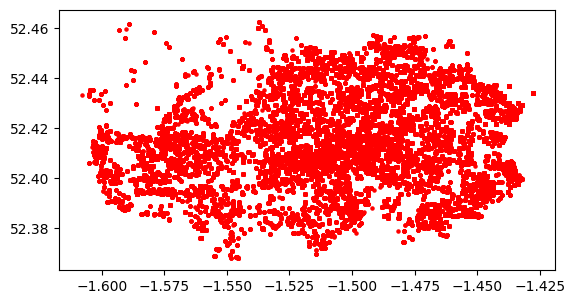

In [35]:
#Geographic Clustering
from shapely.geometry import Point
# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(Analysis_data['Longitude'], Analysis_data['Latitude'])]
gdf = gpd.GeoDataFrame(Analysis_data, geometry=geometry)

# Plot crimes (basic example)
gdf.plot(marker='o', color='red', markersize=5)

In [55]:
#crime type analysis
top_crimes = Analysis_data['Crime type'].value_counts().head(5)
print("\nTop 5 Crime Types:\n", top_crimes)

#crime by time

month_order=['January', 'February', 'March', 'April', 'May', 'June', 
     'July', 'August', 'September', 'October', 'November', 'December']

#Convert Month_Name to categorical with specified order
Analysis_data_reset['MonthName'] = pd.Categorical(Analysis_data_reset['MonthName'], 
                                            categories=month_order, 
                                            ordered=True)
crime_by_month = Analysis_data_reset.groupby(['MonthName', 'Crime type'],observed=False).size().unstack().fillna(0)
print("\nCrime Types by Month:\n", crime_by_month)

#crime by season
crime_by_season = Analysis_data_reset.groupby(['Season', 'Crime type']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", crime_by_season)

seasonal_locations = Analysis_data_reset.groupby(['Season','Location']).size().unstack().fillna(0)
print("\nCrime Types by season:\n", seasonal_locations)



Top 5 Crime Types:
 Crime type
Violence and sexual offences    96601
Vehicle crime                   26081
Criminal damage and arson       19947
Public order                    16963
Other theft                     16540
Name: count, dtype: int64

Crime Types by Month:
 Crime type  Bicycle theft  Burglary  Criminal damage and arson  Drugs  \
MonthName                                                               
January               185      1397                       1722    528   
February              250      1247                       1412    573   
March                 250      1312                       1892    610   
April                 288      1267                       1760    472   
May                   297      1207                       1916    539   
June                  226       944                       1681    424   
July                  276      1043                       1694    410   
August                328      1133                       1631    438  

# Visualisation 

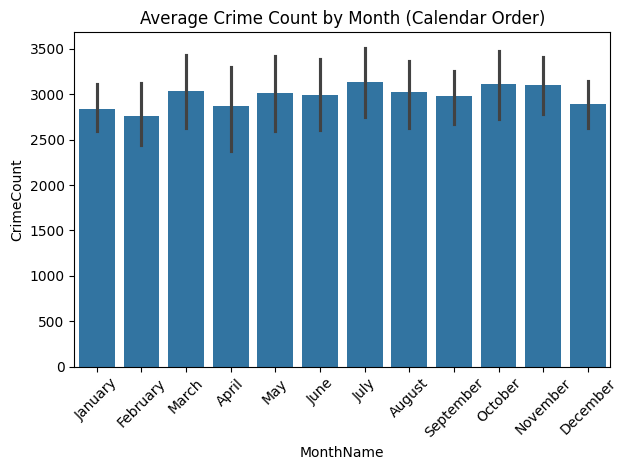

In [37]:
sns.barplot(data=monthly_crime, x='MonthName', y='CrimeCount')
plt.title('Average Crime Count by Month (Calendar Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

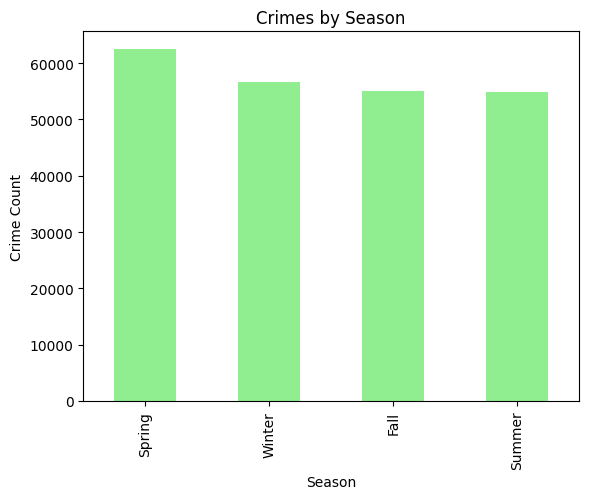

In [38]:
seasonal_counts.sort_values(ascending=False).plot(kind='bar', color='lightgreen').ascending=('False')
plt.title('Crimes by Season')
plt.xlabel('Season')
plt.ylabel('Crime Count')
plt.show()

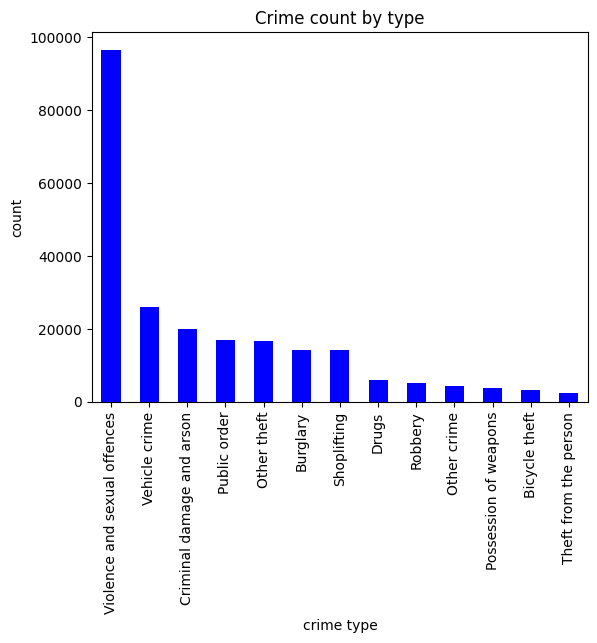

In [39]:
# Crime count by type
crime_count.plot(kind='bar', color='blue')
#visualizing the crime frequency
plt.title('Crime count by type')
plt.xlabel('crime type')
plt.ylabel('count')
plt.show()

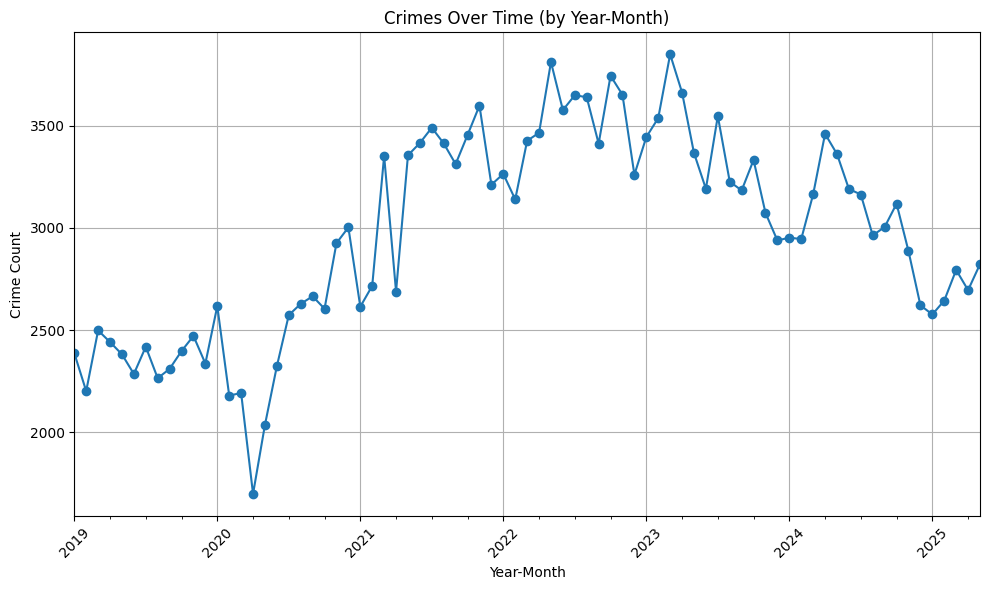

In [42]:
#Line Chart for Temporal Trends
crime_by_year_month = Analysis_data.groupby('Month').size()
# Crimes over time
crime_by_year_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Crimes Over Time (by Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Correlation between latitude and crime count (if aggregated)
print(Analysis_data[['Latitude', 'Longitude']].corr())


           Latitude  Longitude
Latitude     1.0000     0.1621
Longitude    0.1621     1.0000


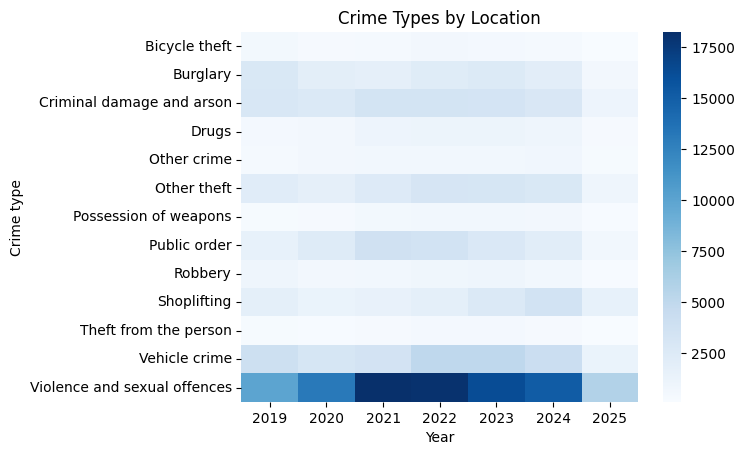

In [50]:
# Crosstab for categorical variables
crime_location = pd.crosstab(Analysis_data_reset['Crime type'].tail(), Analysis_data_reset['Location'])
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Types by Location')
plt.show()